In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import keras
import os
import cv2     # open cv

from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D , Flatten , Dense , Dropout
from keras.utils import to_categorical 

In [6]:
path1 = r"D:\Image_Classifier"
cate = ['Cheetah' , 'Lepord' , 'Lion' , 'Tiger']

for i in cate:
    folders = os.path.join(path1 , i)
    print(folders)

D:\Image_Classifier\Cheetah
D:\Image_Classifier\Lepord
D:\Image_Classifier\Lion
D:\Image_Classifier\Tiger


In [7]:
for i in cate:
    folders = os.path.join(path1 ,i)     ## code enters the dog folder
    for image in os.listdir(folders):     ## this will read all images inside the dog folder
        image_path = os.path.join(folders , image)
        print(image_path)

D:\Image_Classifier\Cheetah\Cheetah1.PNG
D:\Image_Classifier\Cheetah\Cheetah10.PNG
D:\Image_Classifier\Cheetah\Cheetah11.PNG
D:\Image_Classifier\Cheetah\Cheetah12.PNG
D:\Image_Classifier\Cheetah\Cheetah13.PNG
D:\Image_Classifier\Cheetah\Cheetah14.PNG
D:\Image_Classifier\Cheetah\Cheetah15.PNG
D:\Image_Classifier\Cheetah\Cheetah2.PNG
D:\Image_Classifier\Cheetah\Cheetah3.PNG
D:\Image_Classifier\Cheetah\Cheetah4.PNG
D:\Image_Classifier\Cheetah\Cheetah5.PNG
D:\Image_Classifier\Cheetah\Cheetah6.PNG
D:\Image_Classifier\Cheetah\Cheetah7.PNG
D:\Image_Classifier\Cheetah\Cheetah8.PNG
D:\Image_Classifier\Cheetah\Cheetah9.PNG
D:\Image_Classifier\Lepord\lepord1.PNG
D:\Image_Classifier\Lepord\Lepord10.PNG
D:\Image_Classifier\Lepord\Lepord11.PNG
D:\Image_Classifier\Lepord\Lepord12.PNG
D:\Image_Classifier\Lepord\Lepord13.PNG
D:\Image_Classifier\Lepord\Lepord14.PNG
D:\Image_Classifier\Lepord\Lepord15.PNG
D:\Image_Classifier\Lepord\Lepord2.PNG
D:\Image_Classifier\Lepord\Lepord3.PNG
D:\Image_Classifier\Le

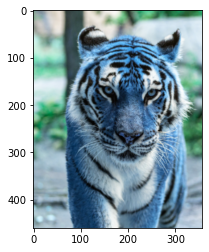

In [8]:
# reading an image

for i in cate:
    folders = os.path.join(path1 ,i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders , image)
        image_array = cv2.imread(image_path)
        plt.imshow(image_array)
        break

In [10]:
image_size = 200     # this 200 is just a number
path1 = r"D:\Image_Classifier"
cate = ['Cheetah' , 'Lepord' , 'Lion' , 'Tiger']     ## so index for this is 0 and 1

input_image = []
for i in cate:
    folders = os.path.join(path1 ,i)
    label = cate.index(i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders , image)
        image_array = cv2.imread(image_path)
        image_array =cv2.resize(image_array , (image_size , image_size) )
        input_image.append([image_array , label])
len(input_image)

60

In [11]:
input_image[0]

[array([[[121, 125, 145],
         [124, 128, 148],
         [124, 129, 149],
         ...,
         [194, 102,  52],
         [194, 103,  52],
         [194, 103,  53]],
 
        [[122, 129, 153],
         [123, 132, 155],
         [128, 136, 159],
         ...,
         [195, 103,  55],
         [196, 104,  57],
         [193, 105,  54]],
 
        [[129, 138, 164],
         [129, 139, 163],
         [132, 142, 166],
         ...,
         [194, 103,  55],
         [195, 104,  57],
         [193, 105,  54]],
 
        ...,
 
        [[108, 105, 143],
         [153, 156, 193],
         [141, 145, 182],
         ...,
         [176, 180, 207],
         [145, 153, 184],
         [148, 156, 191]],
 
        [[111, 108, 147],
         [155, 157, 195],
         [121, 124, 162],
         ...,
         [162, 172, 201],
         [158, 170, 204],
         [168, 175, 209]],
 
        [[119, 112, 151],
         [160, 157, 196],
         [114, 109, 148],
         ...,
         [151, 164, 193],
  

In [12]:
input_image[0][0][0][0]     # gives rgb value for 1st image

array([121, 125, 145], dtype=uint8)

In [13]:
# we are getting x and y (target = label) together... we will separate x and y
# all cat and dog images are together (need to shuffle the data which is equal to ramdom sampling)

In [14]:
np.random.shuffle(input_image)     ## to shuffle the images

In [15]:
X = []
Y = []

for X_values , labels in input_image:
    X.append(X_values)
    Y.append(labels)

X = np.array(X)
Y = np.array(Y)

In [16]:
X.shape

(60, 200, 200, 3)

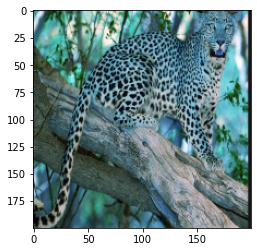

In [17]:
plt.imshow(X[0])     # plotting 1st image

In [18]:
Y     # checking Y value (target value)

array([1, 0, 1, 3, 3, 2, 3, 1, 2, 0, 2, 1, 0, 1, 3, 0, 0, 0, 2, 0, 3, 0,
       2, 3, 0, 2, 2, 1, 2, 3, 1, 0, 0, 2, 1, 0, 3, 3, 0, 2, 3, 1, 3, 1,
       1, 2, 2, 0, 2, 2, 0, 3, 3, 1, 3, 2, 1, 1, 3, 1])

In [19]:
len(Y)

60

In [20]:
X = X/255
X

array([[[[0.22352941, 0.51764706, 0.44313725],
         [0.22745098, 0.55294118, 0.49411765],
         [0.29803922, 0.65490196, 0.65490196],
         ...,
         [0.14509804, 0.2627451 , 0.26666667],
         [0.09411765, 0.08235294, 0.07843137],
         [0.09411765, 0.08235294, 0.07843137]],

        [[0.25882353, 0.59215686, 0.5372549 ],
         [0.23921569, 0.53333333, 0.48235294],
         [0.30196078, 0.64313725, 0.63137255],
         ...,
         [0.15294118, 0.25882353, 0.25490196],
         [0.09411765, 0.08235294, 0.07843137],
         [0.09411765, 0.08235294, 0.07843137]],

        [[0.2745098 , 0.63529412, 0.60784314],
         [0.23529412, 0.52941176, 0.48627451],
         [0.28627451, 0.57254902, 0.54117647],
         ...,
         [0.19607843, 0.26666667, 0.26666667],
         [0.09411765, 0.08235294, 0.07843137],
         [0.09411765, 0.08235294, 0.07843137]],

        ...,

        [[0.2745098 , 0.29411765, 0.26666667],
         [0.19215686, 0.20784314, 0.18039216]

In [22]:
model = Sequential()
model.add(Conv2D(filters = 16 , kernel_size =(3,3) , activation ='relu' ))
model.add(MaxPool2D(pool_size =(2,2)))

model.add(Flatten())

model.add(Dense(128 , activation = 'relu' , input_shape = X.shape[1:]))

model.add(Dense(4 , activation= 'softmax'))

#----#-------------
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy' )
#--------------------
model.fit(X , Y , epochs = 20)

Epoch 1/20
2/2 [==============================] - 1s 309ms/step - loss: 15.4165
Epoch 2/20
2/2 [==============================] - 1s 340ms/step - loss: 71.6555
Epoch 3/20
2/2 [==============================] - 1s 287ms/step - loss: 27.5086
Epoch 4/20
2/2 [==============================] - 1s 287ms/step - loss: 21.2998
Epoch 5/20
2/2 [==============================] - 1s 295ms/step - loss: 19.9710
Epoch 6/20
2/2 [==============================] - 1s 284ms/step - loss: 9.9388
Epoch 7/20
2/2 [==============================] - 1s 382ms/step - loss: 6.9662
Epoch 8/20
2/2 [==============================] - 1s 326ms/step - loss: 5.2722
Epoch 9/20
2/2 [==============================] - 1s 481ms/step - loss: 5.6601
Epoch 10/20
2/2 [==============================] - 1s 317ms/step - loss: 3.5715
Epoch 11/20
2/2 [==============================] - 1s 407ms/step - loss: 1.5264
Epoch 12/20
2/2 [==============================] - 1s 404ms/step - loss: 1.0582
Epoch 13/20
2/2 [===========================

In [23]:
pred = model.predict_classes(X)
pred

C:\Users\KUNAL\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1, 0, 1, 3, 3, 2, 3, 1, 2, 0, 2, 1, 0, 1, 3, 0, 0, 0, 2, 0, 3, 0,
       2, 3, 0, 0, 2, 1, 2, 3, 1, 0, 0, 2, 1, 0, 3, 3, 0, 2, 3, 1, 3, 1,
       1, 2, 2, 0, 2, 2, 0, 3, 3, 1, 3, 2, 1, 1, 3, 1], dtype=int64)

In [24]:
from sklearn.metrics import confusion_matrix

tab = confusion_matrix(pred , Y)
tab

array([[15,  0,  1,  0],
       [ 0, 15,  0,  0],
       [ 0,  0, 14,  0],
       [ 0,  0,  0, 15]], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(pred, Y)

0.9833333333333333